<a href="https://colab.research.google.com/github/gyeongseoMin/DataScience/blob/main/20203060_%EB%AF%BC%EA%B2%BD%EC%84%9C_%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean(-y_train * torch.log(hypothesis) - (1 - y_train) * torch.log(1 - hypothesis))

    cost.backward()
    with torch.no_grad() as grd:
        W = W - lr * W.grad
        b = b - lr * b.grad

    if epoch % 300 == 0:
        print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1800, cost: 0.381517, W: -3.048561, b: 9.232802
epoch: 2100, cost: 0.381500, W: -3.070765, b: 9.299053
epoch: 2400, cost: 0.381494, W: -3.083991, b: 9.338510
epoch: 2700, cost: 0.381492, W: -3.091908, b: 9.362126
epoch: 3000, cost: 0.381491, W: -3.096662, b: 9.376306


In [ ]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [ ]:
#optimzer 사용하기
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean(-y_train * torch.log(hypothesis) - (1 - y_train) * torch.log(1 - hypothesis))

    
    optimizer = torch.optim.SGD([W,b], lr=1.0)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    optimizer = torch.optim.SGD([W,b], lr=1.0)
    optimizer = torch.optim.Adam([W,b], lr=1.0)
    optimizer = torch.optim.Adadelta([W,b])
    optimizer = torch.optim.Adagrad([W,b])
    optimizer = torch.optim.RMSprop([W,b])
    if epoch % 100 == 0:
        print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), W.squeeze(), b.squeeze()))


epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971979, b: 9.004180
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381528, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

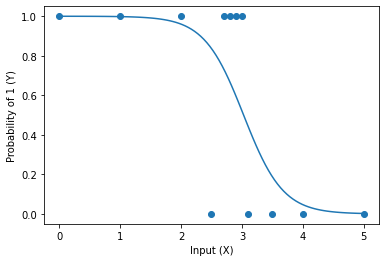

In [ ]:
#Matplotlib 으로 결과 시각화 실습
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train)
X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y)
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.show()


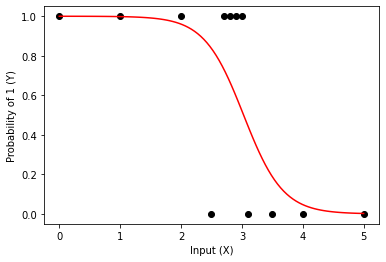

In [ ]:
#Matplotlib 으로 결과 시각화 실습
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train, c="black")
X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y, c="#ff0000")
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.show()

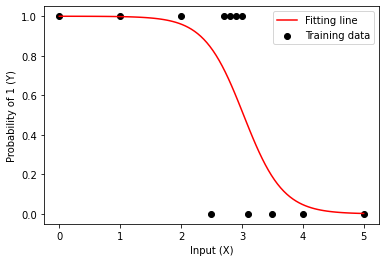

In [ ]:
#Matplotlib 으로 결과 시각화 실습
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train, c="black", label="Training data")
X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y, c="#ff0000", label="Fitting line")
plt.legend()
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.show()

In [ ]:
#sklearn에서 logistic regression사용
from sklearn.linear_model import LogisticRegression
x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] # 입력 shape이 pytorch에서와 다름에 주의!
model = LogisticRegression(penalty='none') # penalty (or regularization)은 추후 설명
model.fit(x_train, y_train)
#W와 b에 해당하는 값 출력
print(model.coef_, model.intercept_)
# 새로운 x값이 주어질 때 y값 예측해보기
x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10385806]] [9.39776831]
[0 1]
